---
title: Week 2 Chemical Reactions in Aqueous Systems
subtitle: Lecture notes Chemistry for Earth Sciences, week 2
author:
  - name: Timo Heimovaara
    affiliations: Delft University of Technology, department of Geoscience & Engineering
    orcid: 
    email: t.j.heimovaara@tudelft.nl
license: CC-BY-NC-ND-4.0 (https://creativecommons.org/licenses/by-nc-nd/4.0/).
date: 2025-12-04
kernelspec:
    name: python3
    display_name: 'Python 3.13'
---



## Learning Objectives
By the end of this chapter, you will:
- Identify and write relevant aqueous chemical reactions for Earth Science systems.
- Apply the **Mass Action Law** and understand activities vs concentrations.
- Use **equilibrium constants** and relate them to **Gibbs free energy**.
- Understand **standard states** and the meaning of equilibrium.
- Transform equilibrium expressions into **logarithmic form** and revisit pH/pOH.
- Develop and solve algebraic systems for chemical equilibria.
- Implement a **Newton-Raphson approach** in Python for non-linear systems.
- Design a **generic algorithm** for multi-species mass action problems.

The background material for this week can be found in Tro, chapter 14 (Chemical Equilibrium) and chapter 17 (Free Energy and Thermodynamics).

---

## 1. Example System: Fluorite–Gypsum in Water
### 1.1 Relevant Reactions
We start with an aqueous system involving **Fluorite (CaF₂)** and **Gypsum (CaSO₄·2H₂O)** dissolution:

$$
\begin{aligned}
\text{CaF}_2\text{(s)} &\leftrightharpoons \text{Ca}^{+2} + 2\text{F}^- \\
\text{CaSO}_4 \cdot \text{2H}_2 \text{O(s)} &\leftrightharpoons \text{Ca}^{+2} + \text{SO}_4^{-2} + 2\text{H}_2\text{O} \\
\text{H}_2 \text{SO}_4  &\leftrightharpoons \text{H}^{+} + \text{HSO}_4^{-} \\
\text{HSO}_4^{-}  &\leftrightharpoons \text{H}^{+} + \text{SO}_4^{-2} \\
\text{H}_2\text{O} &\leftrightharpoons \text{H}^+ + \text{OH}^- \\
\end{aligned}
$$

Fluorite and Gypsum are solids which is indicated with (s) behind the chemical formula. Please note that we already included the sulphate reaction with water producing $\text{HSO}_4^{-}$ and $\text{H}_2 \text{SO}_4$. As we are analysing an aqueous reation we always have to include the **water reaction** as this provides the protons ($\text{H}^+$) for other reactions. 

Please note that in the above reaction system does not contain any redox reactions. In this case all chemical species in the system are combinations of a limited set of primary species.

---


## 2. Mass Action Law
For a general reaction with reactant species $A$ and $B$ and product species $C$ and $D$ we have the reaction:
$$
aA + bB \leftrightharpoons cC + dD
$$
where $a$,$b$,$c$, and $d$ are the stochiometry coefficients of the species in the reaction. These stoichiometry coefficients are important to ensure that mass and charge balance requirements for the chemical reaction are met. 

The **Mass Action Law** for the above reaction is defined as:
$$
\label{mass_action_law}
K = \frac{a_C^c \cdot a_D^d}{a_A^a \cdot a_B^b}
$$

Where $a_i$ are **activities** (not concentrations!) and $K$ is the equilibrium constant, which is the condition that must be met for the reaction to be in equilibrium. The double arrow in the reaction is an indication that the reaction, simultaneously, is running in both directions. The system is in equilibrium if the forward and reverse reaction rates are equal, which implies that the activities of the reactants and products do not change.

## Chemical Equilibrium
:::{note} Chemical equilibrium calculations
Chapter 14 from Tro gives a detailed explanation of the concepts behind chemical equilibrium reactions and usage of the equilibrium constant. Please note that this chapter explains the concepts using gases. As gases do not contain a charge, activities and concentrations are assumed to be identical. If we assume that the reactions take place in a vessel with fixed volume ($V$), pressure ($P$) and temperature ($T$ we can use the ideal gas law to relate pressure to the number of molecules present in the vessel ($n$). Please note that molar concentration of a compound i is the number of moles this compound i normalized to volume: $m_i = n_i/V$. Using the gas law:
$$
P V = n R T
$$

we can rewrite to obtain:
$$
P = \frac{n R T}{V}
$$
Where R is the ideal gas constant.

The total pressure orginates from the total number of gas molecules present in the vessel. The number of molecules of a component $i$ in the vessel leads to a partial pressure $P_i$ which can be calculated from:
$$
P_i = \frac{n_i R T}{V}
$$

````{note} Worked Example
### Worked Example
With the above information you now can solve some interesting problems. For example problem 64 from Tro chapter 14:
Hydrogen can be extracted from natural gas according to the reaction:
$$
\text{CH}_4(g) + \text{CO}_2(g) \; \leftrightharpoons \; 2 \text{CO}(g) + 2\text{H}_2(g)
$$
with $ K_p = 4.5\times 10^2$ at 825 K.

An 85.0-L reaction container initially contains 22.3 kg of $\text{CH}_4$ and 54.4 kg of $\text{CO}_2$ at 825 K. Assuming ideal gas behavior, calculate the mass of $\text{H}_2$ (in g) presen tin the reaction mixture at equilibrium. What is the percent yield of $\text{H}_2$ under these conditions?

We suggest a hybrid strategy to solve this problem: you develop your solution strategy on paper while you do all calculations in python. Finding and correcting errors this way is much faster. 

```{tip} Unknown parameters
When solving assignments, you run into situation where certain parameters are unknown you need to search for these parameters your self.
Many constants such as the gas constante $R$ are used so often, that it is wise for you to store them in a file for quick reference.

Please note that the value of a constant is highly dependent of the units used for the problem. For example, the value of R is completely different if the pressure is given in Pa or atm. Obviously you also need to check the magnitude, values change with units such as mmol, mol or kmol!
```
````
:::


In [1]:
#--- Python script with solution to problem ---
# We can use sympy to solve the problem
import numpy as np
# required information
# molar weights
molweight_CH4 = 12 + 4*1
molweight_CO2 = 12 + 2*16
molweight_CO = 12 + 16
molweight_H2 = 2*1

R = 8.3145 #(L Pa)/(K kmol)
T = 825 # K
V = 85.0 # L

Kp = 450
# Reaction:
# CH4(g) + CO2(g) <==> 2CO(g) + 2H2(g)
# a-x      b-x         2 x      2*x
# so [CO(g)] = x, [H2(g)] = x
#
# Kp = (2 x**2)/(a-x)(b-x)
# solve for x:
# Kp(a-x)(b-x)-2x**2 = 0
# Kp(ab-(a+b)x + x**2)-2x**2 = 0
# (Kp-2)x**2 - Kp(a+b)x + Kp ab = 0
# Apply the quadratic formula: x = (-b +/- sqrt(b**2-4ac))/2a

#x_plus = Kp*(a+b) + np.sqrt(Kp**2*(a+b)**2 - 4*(Kp-2)*(Kp * a* b))/(2 * (Kp-2)
#x_min = Kp*(a+b) - np.sqrt(Kp**2*(a+b)**2 - 4*(Kp-2)*(Kp * a* b))/(2 * (Kp-2)

m_CH4 = 22.3 #kg
m_CO2 = 54.4 # kg

# calculate partial gas pressures from mass present...
# transform to moles
n_CH4 = m_CH4/molweight_CH4  # kmol
n_CO2 = m_CO2/molweight_CO2  # kmol
# calculate partial pressures
P_CH4 = n_CH4 * R * T / V
P_CO2 = n_CO2 * R * T / V

a = P_CH4
b = P_CO2

x_plus = (Kp*(a+b) + np.sqrt(Kp**2*(a+b)**2 - 4*(Kp-2)*(Kp * a* b))) / (2 * (Kp-2))
x_min = (Kp*(a+b) - np.sqrt(Kp**2*(a+b)**2 - 4*(Kp-2)*(Kp * a* b)))/(2 * (Kp-2))

print(f'partial pressure CH_4 (a): {a:.2f}')
print(f'partial pressure CO_2 (b): {b:.2f}')

print(f'solution for xplus: {x_plus:.2f}')
print(f'solution for xmin: {x_min:.2f}')

n_H2 = x_min*V/(R*T)
m_H2 = n_H2 * molweight_H2 

percent_yield = m_H2/m_CH4*100


partial pressure CH_4 (a): 112.48
partial pressure CO_2 (b): 99.77
solution for xplus: 116.14
solution for xmin: 97.06


:::{note} Solution
### Solution of worked example
The python implementation can be found in the hidden Notebook Cell above. Here we summarize the solution steps.
We solve this problem using the equilibrium condition:
$$
K_p = \frac{P_{CO}^2 P_{H_2}^2}{P_{CH_4} P_{CO_2}}
$$

We start by analyzing the stochiometry of the reaction:
$$
\text{CH}_4(g) + \text{CO}_2(g) \; \leftrightharpoons \; 2 \text{CO}(g) + 2\text{H}_2(g)
$$
| | $P_{CH_4}$| $P_{CO_2}$| $P_{CO}$|$P_{H_2}$|
|---|---|---|---|---|
|initial| a| b| 0| 0|
|change |-x|-x|2x|2x|
|final| a-x|b-x|2x|2x|


- $P_{CH_4} = a - x$
- $P_{CO_2} = b - x$
- $P_{CO} = x$
- $P_{H_2} = x$

After subsitution we have:
$$
K_p = \frac{2 x ^2}{(a-x)(b-x)}
$$

In order to solve for x we move everything to the left and then rewrite
$$ K_p(a-x)(b-x)-2x^2 = 0 $$
which we expand
$$K_p(ab - (a+b)x + x^2) -2x^2 = 0$$
$$(K_p-2)x^2 - Kp(a+b)x + x^2) +K_p a b = 0$$

This is a quadratic equation which we can solve with the quadratic formula:
$$
x = \frac{K_p(a+b) \pm \sqrt{K_p^2 (a+b)^2 - 4(K_p-2)K_p a b}}{2 (K_p-2)}
$$

From the above results we see that we need to have the smallest of the two results because $x$ has to be smaller than $a$ or $b$. 

The partial pressure of $\text{H}_2(g)$ is {eval}`format(x_min, ".2f")` Pa. This corresponds to a mass of {eval}`format(m_H2, ".3f")` kg, which corresponds to a percent yield $\frac{m_{H_2}}{m_{{CH_4}_ini}}$ of {eval}`format(percent_yield,".2f")` % methane mass.
:::

## Activities vs Concentrations

In aqueous systems, chemical reactions depend on **activities**, not just concentrations.  Activity coefficients correct for electrostatic interactions in solution, which have a large impact. Using activity corrections is essential for accurate equilibrium calculations in geochemical systems.

The activity of species $i$ is:

$$
a_i = \gamma_i [m_i]
$$

where:
- $[m_i]$ = molar concentration or molarity (mol/L)
- $\gamma_i$ = activity coefficient (dimensionless)


### Ionic Strength
The activity coefficient depends on **ionic strength** $I$, which measures the total charge effect in solution and is calculated with:

$$
I = \frac{1}{2} \sum_{i} m_i z_i^2
$$

where:
- $m_i$ = molarity of ion $i$ (mol/L water)
- $z_i$ = charge of ion $i$

### Davies Equation
There are a number of approaches to estimate the activity of a chemical species in solution. Two well known equations are the Debeye-Hückel and the Davies equations. The Davies equation is an extension of the Debye–Hückel equation. The Debye–Hückel (extended) equation is accurate for I < 0.1 mol/kg, the Davies equation works reasonably well for 0 < I ≤ 0.5 mol/kg. For I > 0.5 mol/kg, you need more advanced models like Pitzer equations or Specific Ion Interaction Theory (SIT), which we will not discuss in this course. The Davies equation is given as:
$$
\log_{10} \gamma_i = -A z_i^2 \left( \frac{\sqrt{I}}{1+\sqrt{I}} - 0.3I \right)
$$
where A = 0.509 at 25°C.

:::{note} Example Calculation
**Example Calculation:**
If you know the molar concentrations in the aqueous solution, you can calculate the activites quite easily. We will now give an example in Python.

We calculate the ionic strength, the activity coefficient, and the activity for all species in solution.
Every time you try to solve a problem with a computer script, you follow several steps:
1. *Initialization*: Define the initial conditions for the script. This gives the script the data it needs in the calculations;
2. *Functions*: Define the equations that the script needs to solve the problem. Sometimes this can be done while performing the calculations, but often it is convenient to define these equations in functions that can be reused over and over again.
3. *Calculations*: Carry out the calculations;
4. *Reporting / Output*: Report the results

:::

In [3]:
# We use pandas to store the data and to run calculations
#--- Initialization ---#
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display, Markdown

# We need to set-up our calculation: define the molar concentrations and charges of the species
# Calculate ionic strength for a solution with Ca2+, SO4(2-), F-, H+, OH-

# We initialize our dataframe using a dictionary
# We want the species to be in the rows, the molar concentrations and the charge in the columns
species = {
    'Ca+2': {'m': 0.01, 'z': 2},
    'SO4-2': {'m': 0.01, 'z': -2},
    'F-': {'m': 0.02, 'z': -1},
    'H+': {'m': 1e-7, 'z': 1},
    'OH-': {'m': 1e-7, 'z': -1}
}

# We can now create the dataframe. Please note that we need to transpose to have the species in the rows
data = pd.DataFrame(species).T
data.index.rename('species',inplace=True)

#--- Functions / Calculations ---#

# calculate the ionic strength:
# I = 0.5 * sum(m * z**2)
I = 0.5 * (data['m'] * data['z']**2).sum()

# define the constant A for the Davies equation
A = 0.509
# Calculate the activity for each of the species and add the result to the dataframe
data['gamma'] = 10 ** (-A * data['z']**2 * ((np.sqrt(I)/(1+np.sqrt(I))) - 0.3*I))
data['activity'] = data['m'] * data['gamma']

table_md = pd.DataFrame(data).to_markdown()

#--- Reporting / Output ---] 
print(f"For a chemical solution with the following species: ")
display(Markdown(table_md))
print(f"the Ionic strength I is: {I:.2f}")
;


For a chemical solution with the following species: 


| species   |     m |   z |    gamma |   activity |
|:----------|------:|----:|---------:|-----------:|
| Ca+2      | 0.01  |   2 | 0.455484 | 0.00455484 |
| SO4-2     | 0.01  |  -2 | 0.455484 | 0.00455484 |
| F-        | 0.02  |  -1 | 0.82152  | 0.0164304  |
| H+        | 1e-07 |   1 | 0.82152  | 8.2152e-08 |
| OH-       | 1e-07 |  -1 | 0.82152  | 8.2152e-08 |

the Ionic strength I is: 0.05


''

:::{note} Interactive Example in python 👈
**Impact of increased molar concentration on activity**
This interactive example shows how the activity of the species in the solution change with changing concentration and therefore changing Ionic strength.
You can use the sliders to change the concentration. Please note how the activity an the activity coefficients change.
:::

In [4]:
#--- Initialization ---#
import seaborn as sns

#--- Equations ---#
A = 0.509
def davies_gamma(z, I):
    return 10 ** (-A * z**2 * ((np.sqrt(I)/(1+np.sqrt(I))) - 0.3*I))

def interactive_davies(Ca_m, SO4_m, F_m):
    # update molar concentrations in data
    data.loc['Ca+2','m'] = Ca_m   
    data.loc['SO4-2','m'] = SO4_m
    data.loc['F-','m'] = F_m
    
    # calculate Ionic strenght
    I = 0.5 * (data['m'] * data['z']**2).sum()

    # Add activity coefficents and activities to data
    data['gamma'] = davies_gamma(data['z'],I)
    data['activity'] = data['m']*data['gamma']
        
    print(f"Ionic Strength: {I:.2f} [mol/kg]")

    sns.barplot(data, x='species',y='activity')
    
    table_md = data[['m','gamma','activity']].to_markdown()
    display(Markdown(table_md))
    # # print(data)

#--- Calculations, Output / Reporting ---# 
widgets.interact(interactive_davies,
     Ca_m=widgets.FloatSlider(min=0, max=0.1, step=0.01, value=0.01),
     SO4_m=widgets.FloatSlider(min=0, max=0.1, step=0.01, value=0.01),
     F_m=widgets.FloatSlider(min=0, max=0.1, step=0.01, value=0.02))
;




interactive(children=(FloatSlider(value=0.01, description='Ca_m', max=0.1, step=0.01), FloatSlider(value=0.01,…

''

## Equilibrium constant, concentrations and activties
Using the activity coefficients it is relatively simple to write the mass action law [](#mass_action_law) as a function of concentrations:
$$
\begin{split}
K = \frac{a_C^c \cdot a_D^d}{a_A^a \cdot a_B^b} \\
= \frac{(f_c m_C)^c \cdot (f_d m_D)^d}{(f_a m_A)^a \cdot (f_b m_B)^b} \\
= \frac{m_C^c \cdot m_D^d}{m_A^a \cdot m_B^b} \frac{f_c^c \cdot f_d^d}{f_a^a \cdot f_b^b} \\
\end{split}
$$

## The activity of solids and water in aqueous systems
The activity of dissolved species in aqueous solutions is determined by the molar concentration and the activity coefficient. However, in the example we are discussing, we have other components besides the dissolved species: The liquid or solute, which is water, and the solids, which are Fluorite $(\text{CaF}_2(s))$ and Gypsum $(\text{CaSO}_4(s))$. Because the amount of water and, in most cases, the solids are so much larger than the dissolved species, **we assume that the activity of water and the solids is equal to 1**. 

### Molar concentration
It is valuable to have a closer look at the concept of molar concentration. It is defined as the number of moles of a species present per unit volume or mass. The molar concentration per unit volume (Liter) is called **molarity**. The molar concentration per unit mass (kg) is called **molality**. Generally, we use the unit liter for volume, which for dilute water solutions is equivalent to 1 kg of water.

:::{note} Self study assignment
Calculate the concentration of the solute water in a dilute aqueous solution.



## Equilibrium vs. Gibbs Energy of a Reaction

Chapter 17 from Tro discusses Free Energy and Thermodynamics in detail. Here we will expand on the content from chapter 17.7 and 17.8. Appendix II.b of Tro, gives a table of Standard Thermodynamic Quantities for Selected substances at 25$^o$C. Similar tables can also be found at websites like: **<https://chem.libretexts.org/Ancillary_Materials/Reference/Reference_Tables/Thermodynamics_Tables/T1%3A_Standard_Thermodynamic_Quantities>** and many more.

### Gibbs free energy relationships
We will mainly focus on the Gibbs free energy, which is convenient to use when we can assume that pressure and temperature are constant. As shown in chapter 17, the Gibbs free energy of a chemical reaction can be written as:
$$
\Delta G_{rxn}^0 = \sum_{n_p} \Delta G_f^0(\text{products}) - \sum_{n_r} \Delta G_f^0 (\text{reactants})
$$
where the subscripts $n_p$ and $n_r$ are the number of products and reactants in the reaction. The Gibbs free energy of reaction is also related to the reaction quotient $Q$, which has a similar definition as the equilibrium coefficient in the mass action law [](#mass_action_law) but with a different meaning. We use $Q$  to denote a reaction that is not in equilibrium, $K$ when it is in equilibrium:
$$
\label{reaction_coefficient}
Q = \frac{a_C^c \cdot a_D^d}{a_A^a \cdot a_B^b}
$$

$\Delta G_{rxn}$ can be written as a function of the Gibbs free energy under standard conditions $\Delta G_{rxn}^0$ and the reaction quotient $Q$:

$$
\Delta G_{rxn} = \Delta G_{rxn}^0 + RT \ln Q
$$

At equilibrium, there will be the change in energy due the reaction will be zero or: $\Delta G_{rxn} = 0$. We know at equilibrium $Q$ is equal to $K$ so we have:
$$
\Delta G_{rxn} = \Delta G_{rxn}^0 + RT \ln Q \\
0 = \Delta G_{rxn}^0 + RT \ln Q 
$$
$$
\label{definition_K}
\Delta G_{rxn}^0 = -RT \ln K
$$

We can now write $\Delta G_{rxn}$ as a function of $K$ and $Q$ which allows us to plot the change in reaction energy as a function of $Q$ for and $K$:
$$
\label{reaction_energy_K}
\Delta G_{rxn} = RT \ln \left(\frac{Q}{K}\right).
$$

With this relationship you can plots like:

```{figure} https://chem.libretexts.org/@api/deki/files/404307/reactive_gibbs_energy.svg?revision=1&size=bestfit&width=710&height=449
:label: Gibbs_Energy_Equilibrium
:name: test_figure
:align: center
:width: 40%
Reactive Gibbs Energy and Equilibria. (CC BY-NC 4.0; Ümit Kaya via LibreTexts)
```

:::{note} Self study questions
- What are the units for $\Delta G_{rxn}$? 
- What is the difference between $\Delta G_f^0$ and $\Delta G_{rxn}^0$
:::


```{note} Programming assignment
## Plot the Gibbs free energy of reaction as a function of the extent of the reaction
$\xi$ is a quantitative measure of how far a reaction has evolved. If we take the reaction between two gases:
$$
\text{A}(g) \leftrightharpoons \text{B}(g),
$$

then we can state that when $\xi=0$, the reaction will have not started and we have 100 % $\text{A}(g)$. When $\xi = 1$, the reaction is complete and we have 100% $\text{B}(g)$.

Make a similar plot as shown in the above block using equation [](#reaction_energy_K), but do this for three values of $K$: 0.1, 1, and 10.

Please note that [](#reaction_energy_K) calculates the change in reaction energy. To obtain the energy you need to integrate, for this example you can use the cumulative sum command in numpy: "cumsum".

````{tip}
Please note that you initialize the problem by defining all information you need to solve your problem. In the 'simulation' section you simulate for all values of $\xi$. An easy way to do this in numpy is to define an array with allfor $\xi$

```

''

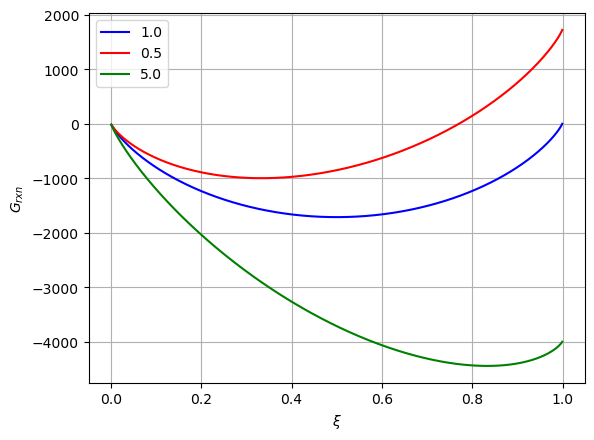

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(1,1)

# A(g) <==> B(g)
#--- Initialize problem ---

K = np.array([1, 0.5, 5]) # Delta G reaction at standard conditions

R = 8.31415e-3 # Ideal gas constant J/(mol K) 
T = 298.15 # Temperature in K (25 Celsius)

#--- Run simulation ---
# x is a parameter expressing how far the reaction has run to the right
# we use x as our x-axis and we create a range of x-values
xi = np.linspace(1e-3,1-1e-3,1001)
# Now we solve the equation for all x-values
A = 1-xi 
B = xi
Q = B/A

dGrdx = np.zeros([3, len(Q)])

for ii in range(len(K)):
    dGrdx[ii,:] = R * T * np.log(Q/K[ii])

Gr = dGrdx.cumsum(axis=1)  

#--- Output ---
plottype = ['b','r','g']
for ii in range(len(Gr)):
    ax.plot(xi, Gr[ii], plottype[ii])
ax.grid(True)
ax.legend(K)
ax.set_ylabel(r'$G_{rxn}$')
ax.set_xlabel(r'$\xi$')
;

## Fluorite and Gypsum

Gibbs energies of formation:
| substance | $\Delta G_f^0$(kJ/mol)|
| ---|---|
|$\text{Ca}^{+2}(aq)$| -553.6|
|$\text{F}^-(aq)$| -278.8|
|$\text{H}^+(aq)$| 0 |
|$\text{OH}^-(aq)$| -157.3 |
|$\text{SO}_4^{-2}(aq)$| -744.6 |
|$\text{HSO}_4^-(aq)$| -754.4|
|$\text{H}_2\text{SO}_4(aq)$| -744.6|
|$\text{CaF}_2(s)$| -1175.6|
|$\text{CaSO}4(s)$| -1322.0|
|$\text{H}_2\text{O}(l)$| -237.1|



In [6]:
R = 8.31515e-3 #kJ/mol
T = 298.15 #K 

dGr0 = -1 * -237.1 + 1 * 0 + 1 * -157.3
K = np.exp(-dGr0/(R*T))
# print(dGr0, K, np.log10(K))
;

''

### Calculate the K-values for the above equations
The K-value for the reactions in this system can be calculated with equation [](#definition_K).
You first calculate:
$$
\Delta G_{rxn}^0 = \sum_i \nu_i \Delta {G_f^0}_i
$$

and 
$$
K = \exp ({-\frac{\Delta G_{rxn}^0}{RT}})
$$

### Working with $\log_{10}$ transformed equations
In general in many geochemical problems we will write the above equations in their $\log_{10}$-transformed equivalent. This is easily done if you remember that the log of a product transforms to a sum of the log transforms and and the log of a value with an exponent becomes a product of the exponent and the log-transform. So the log-transform of [](#mass_action_law) becomes:
$$
\log K = - a \log a_A - b \log a_B + c \log a_C + d \log a_D 
$$

which generalizes to 
$$
\log K = \sum_i \nu_i \log a_i
$$

When estimating the K-value, it is convenient to use $\log_{10} K$ instead. We can obtain this with:
$$ 
\log_{10} K = \frac{\ln K}{\ln 10} = \frac {-\Delta G_{rxn}^0}{RT \ln 10} \approx \frac {-\Delta G_{rxn}^0}{2.303 RT}
$$

For computers, working with log-transforms increases the accuracy of calculations quite considerably. This has to do with the way how floating numbers (real values) are represented in a limited number of bytes.

Machine epsilon ($\epsilon$) is the smallest positive number that, when added to 1 in a computer's floating-point system, produces a result different from 1, indicating the limit of precision for numbers near 1. It quantifies the gap between 1 and the next representable number and serves as an upper bound for relative rounding errors, varying with the computer's architecture and the floating-point format (like single or double precision). In Python we can obtain this number with:

```{code-cell} python
:label: K-value-H2O
import sys
epsilon = sys.float_info.epsilon
print(f"machine epsilon: {epsilon:.4e}")
```
All numbers with an absolute value less than {eval}`format(epsilon,".4e")` will considered to be equal to zero in Python. Taking the log-transform of these numbers will resolve this problem as the numbers then will be in the range of {eval}`format(np.log10(epsilon),".4f")`.

```{exercise} Calculate K-values
:label: Calc-K-values
Use the reactions and the Gibbs energies of formation to calculate the K-values for all reactions in this system.


````{tip}
As you have to do the same calculation, over and over again with different parameters, it is efficient to write a python script to do this.
1. First do one or two of the calculations on paper so you understand the process.
2. Define the initial information you need to calculate the problem with Python. You need to assign all values of the Gibbs energies of formation, the stoichiometry coefficients of reactions etc to be able to calculate the values.

Numpy is well adapted to matrix calculations (linear algebra) from which we can benefit alot if we prepare the data in a structured way. In equation [](#mass_action_law) you see that the products have a positive sign (in the nominator) and the reactants a negative sign (in the denominator). For a general reaction we can also write [](#mass_action_law) as:
$$
K = \prod_i (a_i^{\nu_i}).
$$

where we take the product over all components $i$ in the system where, reactants have negatvie stoichiometry values $\nu_i$ and products positive.
As example we calculate the K-value for the dissociation of water:
$$
\text{H}_2\text{O} &\leftrightharpoons \text{H}^+ + \text{OH}^- \\
$$

The following Python code shows how the caclulatio works:

`````{code-cell} python
:label: K-value-H2O
#--- Initialize problem ---
R = 8.31515e-3 #kJ/mol
T = 298.15 #K 

#--- Solve problem ---
dGr0 = -1 * -237.1 + 1 * 0 + 1 * -157.3
K = np.exp(-dGr0/(R*T))

# --- Report results ---
print(f'K: {K:.3e}')
print(f'log10(K): {np.log10(K):.3f}')
`````
which then gives $K$ as {eval}`format(K,'.3e')`. As this is such a small number it is more convenient to evaluate the $\log_{10}(K)$ which is {eval}`format(np.log10(K),".2f")`.
````
```

In [6]:
#| label: Calculate-log-K-values
import pandas as pd
# Calculate the K-values for the Fluorite, Gypsum system

# --- Initialize ---
R = 8.31515e-3 #kJ/mol
T = 298.15 #K 

# we now create a dictionary where the first for all species present in the system.
# The first value of the dictionary is the dGf0 value, followed by the stoichiometry 
# coefficient of the species in the reaction. Here we describe the dissolution reaction as 
# a function of minimal set of species to describe the reaction. This minimal set are called the primary
# species. The master species only have one stoiochiometry value on the diagonal of the matrix.
# Other species, the secondary species will be composed from the primary species.
dGf0 = {'Ca+2': [-553.6,     1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'F-': [-278.8,       0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        'H+': [0.0,          0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        'OH-': [-157.3,      0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        'SO4-2': [-744.6,    0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        'HSO4-': [-754.4,    0, 0, 1, 0, 1,-1, 0, 0, 0, 0],
        'H2SO4': [-744.6,    0, 0, 2, 0, 1, 0,-1, 0, 0, 0],
        'CaF2(s)': [-1175.6, 1, 2, 0, 0, 0, 0, 0,-1, 0, 0],
        'CaSO4(s)': [-1322.0,1, 0, 0, 0, 1, 0, 0, 0,-1, 0],
        'H2O(l)': [-237.1,   0, 0, 1, 1, 0, 0, 0, 0, 0,-1]}

index = ['dGf0'] + list(dGf0.keys())
dGtab = pd.DataFrame(data = dGf0).T
dGtab.columns = index

# With this setup we can easily calculate the dGr0 and the logK using
# numpy:

# Extract the stoichiometry table from the dataframe 
stoichio = dGtab.iloc[:,1:]
# use numpy (pandas) to do multiply the vector with dGf0 values
# with the stoichio matrix and then sum over the rows
dGr0 = (dGtab['dGf0']*stoichio).sum(axis=1)

# take the dGr0 vector and calculate the logK from this
logK = -dGr0/(R*T*np.log(10))

# The dGr0 and logK values for the primary species cannot be calculated with this system, so we set these values to be zero
dGr0.iloc[:5] = 0
logK.iloc[:5] = 0

#--- Reporting / Output ---] 
# add dGr and logK to the dGtab table
dGtab['dGr0'] = dGr0
dGtab['logK'] = logK

dGtab_md = pd.DataFrame(dGtab).to_markdown()
print(f"The stoichiometry table with calculated logK is: ")
display(Markdown(dGtab_md))


The stoichiometry table with calculated logK is: 


|          |    dGf0 |   Ca+2 |   F- |   H+ |   OH- |   SO4-2 |   HSO4- |   H2SO4 |   CaF2(s) |   CaSO4(s) |   H2O(l) |   dGr0 |      logK |
|:---------|--------:|-------:|-----:|-----:|------:|--------:|--------:|--------:|----------:|-----------:|---------:|-------:|----------:|
| Ca+2     |  -553.6 |      1 |    0 |    0 |     0 |       0 |       0 |       0 |         0 |          0 |        0 |    0   |   0       |
| F-       |  -278.8 |      0 |    1 |    0 |     0 |       0 |       0 |       0 |         0 |          0 |        0 |    0   |   0       |
| H+       |     0   |      0 |    0 |    1 |     0 |       0 |       0 |       0 |         0 |          0 |        0 |    0   |   0       |
| OH-      |  -157.3 |      0 |    0 |    0 |     1 |       0 |       0 |       0 |         0 |          0 |        0 |    0   |   0       |
| SO4-2    |  -744.6 |      0 |    0 |    0 |     0 |       1 |       0 |       0 |         0 |          0 |        0 |    0   |   0       |
| HSO4-    |  -754.4 |      0 |    0 |    1 |     0 |       1 |      -1 |       0 |         0 |          0 |        0 |    9.8 |  -1.71674 |
| H2SO4    |  -744.6 |      0 |    0 |    2 |     0 |       1 |       0 |      -1 |         0 |          0 |        0 |    0   |  -0       |
| CaF2(s)  | -1175.6 |      1 |    2 |    0 |     0 |       0 |       0 |       0 |        -1 |          0 |        0 |   64.4 | -11.2815  |
| CaSO4(s) | -1322   |      1 |    0 |    0 |     0 |       1 |       0 |       0 |         0 |         -1 |        0 |   23.8 |  -4.16923 |
| H2O(l)   |  -237.1 |      0 |    0 |    1 |     1 |       0 |       0 |       0 |         0 |          0 |       -1 |   79.8 | -13.9792  |

### Answers
The log K values for the Fluorite Gypsum system using the thermodynamic values from Tro are:

In [10]:
Markdown(dGtab['logK'].apply(lambda x: f"{x:,.1f}").to_markdown())

|          |   logK |
|:---------|-------:|
| Ca+2     |    0   |
| F-       |    0   |
| H+       |    0   |
| OH-      |    0   |
| SO4-2    |    0   |
| HSO4-    |   -1.7 |
| H2SO4    |   -0   |
| CaF2(s)  |  -11.3 |
| CaSO4(s) |   -4.2 |
| H2O(l)   |  -14   |

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>logK</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Ca+2</th>\n      <td>0.0</td>\n    </tr>\n    <tr>\n      <th>F-</th>\n      <td>0.0</td>\n    </tr>\n    <tr>\n      <th>H+</th>\n      <td>0.0</td>\n    </tr>\n    <tr>\n      <th>OH-</th>\n      <td>0.0</td>\n    </tr>\n    <tr>\n      <th>SO4-2</th>\n      <td>0.0</td>\n    </tr>\n    <tr>\n      <th>HSO4-</th>\n      <td>-1.7</td>\n    </tr>\n    <tr>\n      <th>H2SO4</th>\n      <td>-0.0</td>\n    </tr>\n    <tr>\n      <th>CaF2(s)</th>\n      <td>-11.3</td>\n    </tr>\n    <tr>\n      <th>CaSO4(s)</th>\n      <td>-4.2</td>\n    </tr>\n    <tr>\n      <th>H2O(l)</th>\n      <td>-14.0</td>\n    </tr>\n  </tbody>\n</table>'